<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  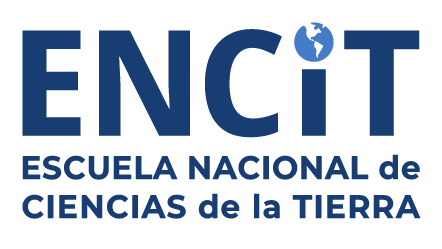
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: MAnálisis Geoespacial de Datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Técnicas de análisis raster y vectorial </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Técnicas de análisis raster y vectorial </font>**

## **<font color="SeaGreen"> ¿Qué son los datos geoespaciales? </font>**

> Los datos geoespaciales son datos con informacion de ubicaciones especificas asociadas a cada dato. 
> Primero que nada, son datos y se pueden hacer muchas operaciones similares a aquellas que no tienen informacion espacial.

Con datos geoespaciales, cada observación tiene una ubicación que puede ser "colocada" en un mapa. Esto nos permite encontrar relaciones espaciales entre los datos.

El verdadero poder de los datos geoespaciales es la habilidad de combinar tanto los datos como su ubicación, desbloqueando varias oportunidades para análisis más sofisticados. 

## **<font color="SeaGreen"> Datos espaciales </font>**

> Los datos espaciales vienen es todas formas y tamaños. Un ejemplo típico de datos geoespaciales tradicionales son los datos de los censos guvernamentales. Sin embargo, hoy en día tenemos muchas mas fuentes de datos espaciales; como monitorear una corrida en bici con un smartphone.

En las ciencias de información geográfica, existen dos modelos de datos para describir "el mundo": 
* El primero, es un modelo de ráster, que codifica al mundo como una superficie contínua representada por mallas, o pixeles. Algunos ejemplos son los datos de latitud-longitud o imagenes satelitales.
* El segundo, es un modelo de datos vectoriales en el que se representa "el mundo" como una colección de objetos discretos usando puntos, líneas y polígonos.

![Raster and Vector](ras_vec.png)

## **<font color="SeaGreen"> Datos ráster vs datos vectoriales </font>**

Aquí hay un ejemplo de los dos tipos de datos para una misma area. En la izquierda, hay una imagen satelital térmica mostrando la perdida de calor de edificios.

En la derecha, hay una representacion de datos vectoriales de la misma área: características discretas donde los edificios son representados como polígonos, y los caminos como líneas.

En este notebook (y el siguiente), nos enfocaremos en los **datos vectoriales**. 

![Raster vs Vector](ras_vs_vec.png)


## **<font color="SeaGreen"> Caracteristicas de datos vectoriales. </font>**

Las "características vectoriales" se componen de tres tipos diferentes de geometrías: 
* para comenzar tenemos una geometría de punto: una única ubicación con coordenadas X e Y.

* una línea es un grupo de puntos conectados. En el código, observarás que se denomina cadena lineal.

* un polígono se forma mediante una línea cerrada que rodea un área. Además, una figura también puede constar de múltiples geometrías, como un multipolígono.

![punto linea poligono](punto_linea_poli.png)


## **<font color="SeaGreen"> Un ejemplo </font>**

**Podemos representar los países como polígonos, como se muestra a continuación.**

![paises](countries.png)

**Ahora agregamos la ubicación de las megaciudades como puntos.**

![paises y megaciudades](countries_and_megacities.png)

**Finalmente, agregamos algunos de los ríos mas grandes del mundo como líneas.**


![paises megaciudades y rios](countries_megacities_and_rivers.png)



Otro concepto importante son los atributos de las características:
> Normalmente, tendremos información sobre nuestras características vectoriales. Usando los polígonos de los paises como ejemplo, podríamos tener información sobre el nombre del pais, su capital, número de población, etc. Cuando tenemos una colección de dichas características, por ejemplo, todos los paises del mundo, combinada con sus atributos, obtenemos una tabla.


In [ ]:
!pip install contextily
!pip install mapclassify


### **<font color="SeaGreen"> Restaurantes en París </font>**

A lo largo de los ejercicios, trabajaremos con varios conjuntos de datos sobre la ciudad de París.

En este ejercicio, comenzaremos explorando un conjunto de datos sobre los restaurantes del centro de París (compilado a partir de un conjunto de datos abierto de Paris Data). Los datos contienen las coordenadas de las ubicaciones de los restaurantes y una descripción del tipo de restaurante.

Aquí, usaremos `Pandas` para leer el archivo CSV proporcionado y luego usaremos `Matplotlib` para visualizar los puntos. 
Con `Matplotlib`, primero creamos una figura y un objeto de ejes con `fig, ax = plt.subplots()`, y luego usamos este objeto de ejes (`ax`) para crear el gráfico.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import contextily
import geopandas

from shapely.geometry import Point
import mapclassify

In [ ]:
# Leemos el archivo csv
restaurants = pd.read_csv("paris_restaurants.csv")

# Inspeccionamos las primeras filas del dataframe restaurants
print(restaurants.head())

In [ ]:
# Hacer un grafico con todos los puntos
fig, ax = plt.subplots()
ax.plot(_____________, _____________, 'o')
plt.show()

### **<font color="SeaGreen"> Añadir un mapa de fondo </font>**

Un gráfico con solo algunos puntos puede ser difícil de interpretar sin contexto espacial. Por lo tanto, en este ejercicio aprenderemos a añadir un mapa de fondo.

Utilizaremos el paquete `contextily`. La función `add_basemap()` de este paquete facilita la adición de un mapa web de fondo a nuestro gráfico. Empezamos trazando los datos y luego pasamos el objeto axes de matplotlib a la función `add_basemap()`. `contextily` descargará los mosaicos web necesarios para la extensión geográfica del gráfico.

Para establecer el tamaño de los puntos trazados, podemos usar la palabra clave `markersize` del método `plot()`.



In [ ]:
# Figura de todos los restaurantes con el background
fig, ax = plt.subplots()
ax.plot(___________,___________, 'o', markersize = 1)
contextily.add_basemap(ax)
plt.show()


<div class="alert alert-block alert-info">
<b>Nota:</b> El archivo csv contine datos de puntos de coordenadas; sin embargo, la los datos espaciales tambien pueden ser poligonos o lineas. Cada objeto consiste de muchos puntos, y por lo tanto es posible representarlos bien en un CSV. Por lo tanto, continuaremos usando archivos con formatos especificos para datos geoespaciales, como GeoJSON, GeoPackage o shapefiles. Estos estan diseniados especialmente para almacenar datos espaciales, ademas de tabulares.  Para leear y trabajar con estos archivos en python, usaremos GeoPandas.
</div>


#### **<font color="blue"> Distritos administrativos de París </font>** 


En este ejercicio, presentamos el siguiente conjunto de datos sobre París: los distritos administrativos de París (compilados a partir de un conjunto de datos abierto de Paris Data https://opendata.paris.fr/explore/dataset/quartier_paris/ ).

El conjunto de datos está disponible como archivo GeoPackage, un formato especializado para almacenar datos vectoriales geoespaciales, y GeoPandas puede leer dicho archivo mediante la función `geopandas.read_file()`.

Para obtener una primera idea del conjunto de datos, podemos inspeccionar las primeras filas con `head()` y realizar una visualización rápida con `plot()`. La información de los atributos sobre los distritos incluidos en el conjunto de datos es el nombre del distrito y la población (número total de habitantes de cada distrito).

In [ ]:
# Leer los datos del 'paris_districts_utm.geojson'
districts = geopandas.____(____)

# Inspeccionar las primeras filas
print(districts.____)

# Hacer una pequeña y rápida gráfica
districts.____
plt.show()

En el ejercicio anterior, utilizamos el método `plot()` personalizado del GeoDataFrame, que genera una visualización sencilla de las geometrías del conjunto de datos. Los objetos GeoDataFrame y GeoSeries pueden considerarse objetos DataFrame y Series con capacidad espacial y, en comparación con sus homólogos de Pandas, exponen métodos y atributos espaciales adicionales.

El atributo `.geometry` de un GeoDataFrame siempre devuelve la columna con los objetos geométricos como una GeoSeries, independientemente del nombre real de la columna (en el caso predeterminado, también se llamará "geometry").

Otro ejemplo de función espacial adicional es el atributo `area`, que proporciona el área de los polígonos.


In [ ]:
# Checar qué tipo de objeto es districts
print(type(____))

# Checar el tipo de geometría de districts 
print(____)

# Inspeccionar las primeras filas de las geometrías
print(districts.____)

# Inspeccionar el área de los distritos
print(districts.____)

#### **<font color="blue"> Los restaurantes de París como un GeoDataFrame </font>** 

En el primer ejercicio, importamos las ubicaciones de los restaurantes de París desde un archivo CSV. Para habilitar las funciones geoespaciales de GeoPandas, queremos convertir el DataFrame de Pandas en un GeoDataFrame. Esto se puede hacer con el constructor `GeoDataFrame()` y la función `geopandas.points_from_xy()`.

Ahora que tenemos un GeoDataFrame, todas las funciones espaciales están disponibles, como el trazado de las geometrías. En este ejercicio, crearemos la misma figura que en el primer ejercicio con el conjunto de datos de restaurantes, pero ahora utilizando el método `plot()` del GeoDataFrame.

In [ ]:
# leer el csv de "paris_restaurants.csv"
df = _______________________

# Convertir df a un GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# Inspeccionar las primeras filas del GeoDataFrame restaurants
print(restaurants.____)

# Hacer un mapa de los restaurants
ax = restaurants.____
import contextily
contextily.____(____)
plt.show()

#### **<font color="blue"> Visualización de la densidad de población </font>** 

Volvamos al conjunto de datos de distritos. En un ejercicio anterior, visualizamos los distritos con una columna uniforme. Sin embargo, a menudo queremos mostrar la variación espacial de una variable y colorear los polígonos según corresponda.

En este ejercicio, visualizaremos la variación espacial de la densidad de población en el centro de París. Para ello, primero calcularemos la densidad de población dividiendo el número de población por el área y la añadiremos como una nueva columna al DataFrame.


In [ ]:
# Inspeccionar las primeras filas de districts
print(districts.head())


In [ ]:
# Inspeccionar el área de districts
print(districts.____)

In [ ]:

# Agregar una columna con la densidad de población
#'population_density' representa el número de habitantes por km2
# (Nota: El área está dada en metros cuadrados, tienen que multiplicar el resultado por 10**6).
districts['population_density'] = ____ / ____ * ____

# Hacer un mapa de los distritos coloreados por la densidad de población
districts.____(column = 'population_density', legend=True)
plt.show()

Aunque estas clases se centrarán en la funcionalidad espacial de GeoPandas, recuerden que seguimos utilizando un dataframe y que todas las funciones de Pandas que conoce siguen siendo aplicables.

En este ejercicio, repasaremos la operación `groupby`. Se puede utilizar esta operación cuando se tiene una columna que contenga grupos y se desea calcular una estadística para cada grupo. En el método `groupby()`, se pasa la columna que contiene los grupos. En el objeto resultante, se puede llamar al método que se desea calcular para cada grupo. En este ejercicio, queremos conocer el tamaño de cada grupo de restaurantes.


In [ ]:
restaurants.head()

In [ ]:
#Usaremos el geodataframe  restaurants

# Calcular el número de restaurantes de cada tipo
type_counts = restaurants.groupby(____).____()

# Imprimir el resultado
print(____)

#### **<font color="blue"> Trazado de múltiples capas </font>** 


Otra función típica de Pandas es el filtrado de un dataframe: se toma un subconjunto de las filas según una condición (lo que genera una máscara booleana).

En este ejercicio, tomaremos el subconjunto de todos los restaurantes africanos y crearemos un gráfico multicapa. En dicho gráfico, combinamos la visualización de varios GeoDataFrames en una sola figura. Para añadir una capa, podemos usar la palabra clave `ax` del método `plot()` de un GeoDataFrame para pasarle un objeto axes de matplotlib.


1. Seleccionamos un subconjunto de filas en el que el tipo es 'African restaurant'.
2. Hacer un mapa con todos los restaurantes y mostrarlo en color gris. Recuerden pasar el objeto axes, `ax`, por `plot()`.
3. Agregar otra capa ahora sólo con los restaurantes africanos, en rojo.
4. Remover la caja con ubicaciones usando `set_axis_off()` en el objeto axes de matplotlib.


In [ ]:
# Cargar los datos
#restaurants = geopandas.read_file("paris_restaurants.geosjon")

# Crear el subconjunto de restaurantes africanos
african_restaurants = ____

# Hacer el mapa
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.____
african_restaurants.____
# Quitar la caja con ubicaciones
ax.set_axis_off()
plt.show()

#### **<font color="blue"> Geometrías bien formadas y relaciones espaciales </font>** 



La Torre Eiffel es una torre de celosía de hierro construida en el siglo XIX y probablemente ofrece la vista más emblemática de París.

La ubicación de la Torre Eiffel es: x de 255422.6 e y de 6250868.9. Crearemos una geometría de punto y haremos algunas cuentitas. 


In [ ]:
pip install folium matplotlib mapclassify

In [ ]:
districts.explore() 

In [ ]:
print(districts.crs)

In [ ]:
# Latitud y longitud (EPSG:4326)
eiffel_tower = gpd.GeoSeries([Point(2.2945, 48.8584)], crs="EPSG:4326")

# Transformar al CRS de los distritos
eiffel_tower_utm = eiffel_tower.to_crs(districts.crs)
eiffel_tower_utm


### **<font color="blue"> Métodos espaciales de Shapely </font>** 

Ahora que tenemos un objeto `Point` de Shapely para la Torre Eiffel, podemos usar los diferentes métodos disponibles en dicho objeto geométrico para realizar operaciones espaciales, como calcular una distancia o comprobar una relación espacial.

Usaremos el geodataframe `districts` de nuevo.

Algunas operaciones que podemos usar son las siguientes:

* objeto1.distance(objeto2)
* objeto1.area
* objeto1.contains(punto)
* punto.within(objeto1)
* objeto1.touches(objeto2)
* objeto1.intersects(objeto2)

Para mas operaciones:
https://shapely.readthedocs.io/en/stable/measurement.html
https://shapely.readthedocs.io/en/stable/constructive.html

In [ ]:
# filtramos la geometría del distrito de Montparnasse (Polygon) y la geometría de un restaurante
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# ¿ Se encuentra la Torre Eiffel en el distrito Montparnasse?
print(____)

# ¿El distrito Montparnasse contiene al restaurante?
print(____)

# ¿Cuál es la distancia entre la Torre Eiffel y el restaurante?
print(____)

### **<font color="blue"> ¿En qué distrito de la Torre Eiffel se encuentra? </font>** 


Volvamos al ejemplo de la Torre Eiffel. En ejercicios anteriores, construimos una geometría de punto para su ubicación y comprobamos que no se encontraba en el distrito de Montparnasse. Ahora, determinemos en qué distrito de París se encuentra.

* Primero, crearemos una máscara booleana (o filtro) que indique si cada distrito contiene la Torre Eiffel. 
* Luego, filtraremos el dataframe de `districts` con la máscara booleana.

In [ ]:
# Crear una máscara booleana (Series) aplicando el método contains a todos los distritos.

mask = ____.contains(__________.iloc[0])


In [ ]:
# Imprimir la serie booleana 
print(mask.head())

# Filtrar los distritos con la máscara booleana
print(____)

### **<font color="blue"> ¿A qué distancia está el restaurante más cercano? </font>** 


Ahora, podríamos estar interesados en los restaurantes cercanos a la Torre Eiffel. Para explorarlos, visualicemos la Torre Eiffel y los restaurantes en un radio de 1 km.

Para ello, podemos calcular la distancia a la Torre Eiffel para cada restaurante. Con base en este resultado, podemos crear una máscara que tome "Verdadero" si el restaurante está a menos de 1 km y "Falso" en caso contrario, y usarla para filtrar el GeoDataFrame de `restaurants`. Finalmente, visualizamos este subconjunto.

En este caso definiremos `eiffel_tower = Point(255422.6, 6250868.9)`

1. Calcula la distancia a la Torre Eiffel para cada restaurante y llama al resultado dist_eiffel.
2. Imprime la distancia al restaurante más cercano (que es el mínimo de dist_eiffel).
3. Selecciona las filas del GeoDataFrame de restaurantes donde la distancia a la Torre Eiffel sea inferior a 1 km (ten en cuenta que la distancia está en metros).

In [ ]:
eiffel_tower = Point(255422.6, 6250868.9)
# Calcular la distancia de cada restaurante a la Torre Eiffel
dist_eiffel = ____

# Obtenemos la distancia mínima
print(dist_eiffel.____)

# Filtramos los restaurantes que cuya distancia es menor que 1km (recuerden que estamos trabajando en metros)
restaurants_eiffel = ____

# Hacemos el mapa de los restaurante más cercanos
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

### **<font color="blue"> París: unión espacial de distritos y estaciones de bicicletas </font>** 

Volvamos a los datos de París sobre distritos y estaciones de bicicletas. Ahora utilizaremos la operación de unión espacial para identificar el distrito donde se ubica cada estación.

Utilice la función geopandas.sjoin() para añadir el nombre del distrito donde se ubica cada estación al conjunto de datos de estaciones. Llame al resultado "joined".
Compruebe el resultado mostrando las primeras cinco filas.

In [ ]:
#Cargamos los datos de las estaciones
stations = geopandas.read_file('paris_sharing_bike_stations_utm.geojson')
stations.head()

In [ ]:
districts.head()

In [ ]:
# unimos los GeoDataFrames stations y districts
joined = geopandas.sjoin(__________, ___________)

# Inspeccionamos las primeras filas 
print(joined.____)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio: Mapa de densidad arbórea por distrito </font>**

Utilizando un conjunto de datos de todos los árboles en espacios públicos de París, el objetivo es crear un mapa de la densidad arbórea por distrito. Para ello, primero necesitamos determinar cuántos árboles hay en cada distrito, lo cual haremos en este ejercicio. En el siguiente ejercicio, utilizaremos este resultado para calcular la densidad y crear un mapa.

Para obtener el recuento de árboles por distrito, primero necesitamos saber en qué distrito se encuentra cada árbol, lo cual podemos hacer mediante una unión espacial. A continuación, con el resultado de la unión espacial, calcularemos el número de árboles ubicados en cada distrito mediante la función de agrupación de Pandas.


<font color="DarkBlue"> 1. Importen el conjunto de datos de árboles "paris_trees.gpkg" y llámelo `Trees`. Lea también el conjunto de datos de distritos que vimos anteriormente ("paris_districts_utm.geojson") y llámelo `districts`.
    
<font color="DarkBlue"> 2. Imprima las primeras 5 filas de cada geodataframe
    

In [ ]:
# Read the trees and districts data
trees = ____
districts = ____

# The trees dataset with point locations of trees
print(trees.head())


<font color="DarkBlue"> 3.  Agreguen una columna con el nombre del distrito al conjunto de datos de árboles mediante una unión espacial (usando sjoin). Llame al resultado "joined".

In [ ]:
# Spatial join of the trees and districts datasets
joined = ____

<font color="DarkBlue"> 4. Calcular el número de árboles en cada distrito. Para esto:

    * Agrupar el DataFrame unido por la columna "district_name" y calcular el tamaño de cada grupo. 
    * Convertir la serie resultante "trees_by_district" en un DataFrame.

In [ ]:
# Calculate the number of trees in each district
trees_by_district = joined.____

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district.head())

<font color="DarkBlue"> 4.Una vez obtenido el número de árboles por distrito, podemos crear el mapa de los distritos coloreado según la densidad arbórea.

Para ello, primero debemos fusionar el número de árboles de cada distrito calculado en el paso anterior (`trees_by_district`) con el conjunto de datos de `'districts'`. Utilizaremos la función `pd.merge()` para unir los dos dataframes usando la columna común `'district_name'`.

Dado que no todos los distritos tienen el mismo tamaño, es más preciso visualizar la densidad arbórea: el número de árboles en relación con el área.

Utilice la función `pd.merge()` para fusionar los DataFrames `'districts'` y `trees_by_district` en la columna `'district_name'`.Llame al resultado `'districts_trees'`.

In [ ]:
# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(____)

# Inspect the result
print(districts_trees.head())

<font color="DarkBlue"> 5. Agregue una columna `'n_trees_per_area'` al DataFrame `'districts_trees'`, esta debe ser la columna `'n_trees'` dividida por el área.

In [ ]:
# Add a column with the tree density
districts_trees['n_trees_per_area'] = ____

<font color="DarkBlue"> 6. Realice una gráfica/mapa del DataFrame `'districts_trees'`, utilizando la columna `'n_trees_per_area'` para determinar el color de los polígonos.

In [ ]:

# Make of map of the districts colored by 'n_trees_per_area'
____
plt.show()

#####  **<font color="DodgerBlue"> Coropleta de intervalos iguales </font>**

En el ejercicio anterior, creamos un mapa de la densidad arbórea. Ahora exploraremos esta visualización con más detalle.

Primero, visualicemos el efecto de usar solo el número de árboles en comparación con el número de árboles normalizado por el área del distrito (la densidad arbórea). Segundo, crearemos una versión de intervalos iguales de este mapa en lugar de usar una escala de colores continua. Este algoritmo de clasificación dividirá el espacio de valores en contenedores iguales y asignará un color a cada uno.

Crea un gráfico usando la variable 'n_trees' para colorear los polígonos. Asegúrate de mostrar también una leyenda usando la palabra clave legend.
Repite el mismo proceso con la variable 'n_trees_per_area'. ¿Ves la diferencia?
Genera una coropleta con la variable 'n_trees_per_area' usando un esquema de clasificación de intervalos iguales. Nuevamente, asegúrate de agregar una leyenda.


In [ ]:
# Hacer una choropleth del número de árboles 
districts_trees.plot(column = 'n_trees', legend=True)
plt.show()

# Hacer una choropleth del número de árboles por área
districts_trees.plot(column = 'n_trees_per_area', legend=True)
plt.show()

# Hacer una choropleth del número de árboles por área usando intervalos iguales
districts_trees.plot(column = 'n_trees_per_area', scheme = 'equal_interval', legend=True, legend_kwds={
        'fmt': '{:.8f}'  # Muestra los valores con 2 decimales
    })
plt.show()

#####  **<font color="DodgerBlue"> Coropleta de cuantiles </font>**

En este ejercicio, crearemos una versión cuantil del mapa de densidad de árboles. Recuerde que el algoritmo cuantil clasifica y divide los valores en grupos con el mismo número de elementos para asignar un color a cada uno. En esta ocasión, crearemos siete grupos que asignan los colores del mapa de colores YlGn a todo el conjunto de valores.

Genere una coropleta utilizando la variable 'n_trees_per_area', un esquema de clasificación cuantil con 7 clases y el mapa de color YlGn. Asigne el resultado a la variable ax.
Elimine los marcos, las marcas y las etiquetas de las marcas del gráfico para obtener un mapa más limpio mediante el método set_axis_off().

In [ ]:
# Creamos una choropleth y la guardamos en axis, usamos ahora los cuantiles
ax = districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True,  legend_kwds={
        'fmt': '{:.8f}'  # Muestra los valores con 2 decimales
    })

ax.set_axis_off()
plt.show()

#####  **<font color="DodgerBlue"> Comparación de algoritmos de clasificación </font>** 

En este ejercicio final, creará una figura multimapa que le permitirá comparar los dos enfoques para las variables de mapa que hemos visto.

Se basará en patrones estándar de matplotlib para crear una figura con dos subgráficas (ejes axes[0] y axes[1]) y mostrar en cada una de ellas, respectivamente, una coropleta basada en intervalos iguales y cuantiles. Una vez creadas, compárelas visualmente para explorar las diferencias que el algoritmo de clasificación puede tener en el resultado final.

Este ejercicio incluye un objeto GeoDataFrame cargado con el nombre district_trees que incluye la variable n_trees_per_area, que mide la densidad de árboles por distrito.
Cree una coropleta para la columna 'n_árboles_por_área' utilizando el esquema de clasificación de intervalos iguales en la primera subgráfica (axes[0]). Recuerde que puede pasar el objeto axes de matplotlib a la palabra clave ax.
Haga lo mismo para el esquema de clasificación de cuantiles en la segunda subgráfica (axes[1]). Al igual que en la gráfica anterior, establezca el título y elimine las etiquetas de los cuadros y los ejes para crear una figura más clara.

In [ ]:
# creamos la figura y sub mapas 
fig, axes = plt.subplots(nrows=2) # mapa con intervalos iguales
districts_trees.plot(column='n_trees_per_area', scheme ='equal_interval', k=5, legend=True,legend_kwds={ 'fmt': '{:.8f}'}, ax=axes[0]) 
axes[0].set_title('Equal Interval') 
axes[0].set_axis_off() 
#mapa con cuantiles
districts_trees.plot(column = 'n_trees_per_area', scheme = 'quantiles', k=5, legend=True, legend_kwds={ 'fmt': '{:.8f}'}, ax=axes[1]) 
axes[1].set_title('Quantiles') 
axes[1].set_axis_off() 
# mostramos mapas
plt.show()

In [ ]:
# Los mismo pero más bonito 

# Ajusta el tamaño de la figura. Aumenta la altura para tener más espacio vertical.
# Se usa (ancho, alto) en pulgadas. Un valor de (10, 10) o (12, 12) suele ser un buen punto de partida.
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Plot del mapa con intervalo igual
districts_trees.plot(
    column='n_trees_per_area',
    scheme='equal_interval',
    k=5,
    legend=True,
    legend_kwds={'fmt': '{:.8f}'},
    ax=axes[0]
)
axes[0].set_title('Intervalo Igual')
axes[0].set_axis_off()

# Plot del mapa con cuantiles
districts_trees.plot(
    column='n_trees_per_area',
    scheme='quantiles',
    k=5,
    legend=True,
    legend_kwds={'fmt': '{:.8f}'},
    ax=axes[1]
)
axes[1].set_title('Cuantiles')
axes[1].set_axis_off()

# Ajusta el espacio entre subgráficos para evitar solapamientos
plt.tight_layout()

# Muestra los mapas
plt.show()
